<a href="https://colab.research.google.com/github/XiaonaZhou/data_analytics_2/blob/main/Python/Unit_4/KNN_with_Classified_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

KNN stands for K nearest neighbors. 

**The idea behind KNN**: the label of our target is determined by the labels of  the n data points that are nearest to it. For example, when k = 5, we would get the labels of the nearst 5 data points. Let's say we have labels, T,T,T,F, and F, then, label of the target is T. Because we have 3 Ts and only 2 Fs. 

**How to choose K value**

Use trail and error to find a K-value that works the best for the dataset.


# Example

## 1. Import libraries and dataset

In [7]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Classified%20Data')

In [9]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [10]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## 2. Standardize the dataset

**Why**: Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters.  

Any variables that are on a large scale will have a much larger effect on the distance between the observations, and also on the KNN model, than variables that are on a small scale.


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(df.drop('TARGET CLASS', axis=1)) # standardize the dataset without the label. DO NOT standardize label

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1)) # column names were removed after standardize
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [16]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1]) # add back column names

In [17]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## 3. Split dataset into training set and testing set

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.30, random_state=101)

## 4. Modeling with KNN



In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=1) # try k = 1

In [22]:
knn.fit(x_train, y_train) # fitting the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [23]:
pred = knn.predict(x_test) # make prediction on test data 

# 5. Evaluation

Check confusion matrix to evaluate our model.

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(confusion_matrix(y_test, pred))# check confusion ma

[[151   8]
 [ 15 126]]


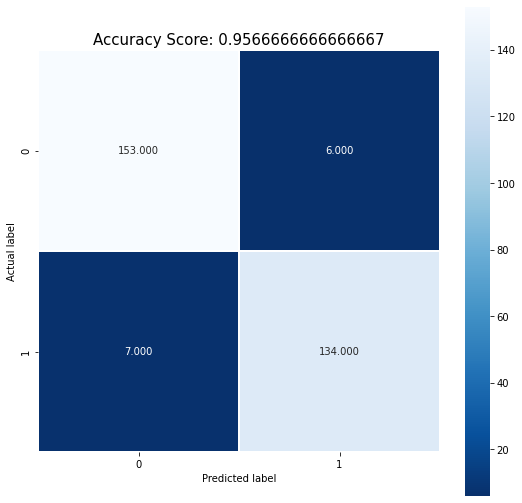

In [31]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(x_test, y_test))
plt.title(all_sample_title, size = 15);

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



From the report, we see that all the scores are above 0.9. That means we have a decent model. 

## 6. Test out different K values 

Accuracy score

In [35]:
from sklearn import metrics
score =[]
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

print(score)

[0.9233333333333333, 0.91, 0.95, 0.93, 0.9433333333333334, 0.95, 0.9333333333333333, 0.94, 0.95, 0.9433333333333334, 0.9466666666666667, 0.9533333333333334, 0.95, 0.9433333333333334, 0.9433333333333334, 0.95, 0.95, 0.9533333333333334, 0.95, 0.9466666666666667, 0.95, 0.95, 0.9366666666666666, 0.9433333333333334, 0.9433333333333334, 0.95, 0.95, 0.9533333333333334, 0.94, 0.95, 0.9433333333333334, 0.9533333333333334, 0.9466666666666667, 0.9566666666666667, 0.9533333333333334, 0.9566666666666667, 0.9533333333333334, 0.9566666666666667, 0.95]


Text(0, 0.5, 'Testing Accuracy')

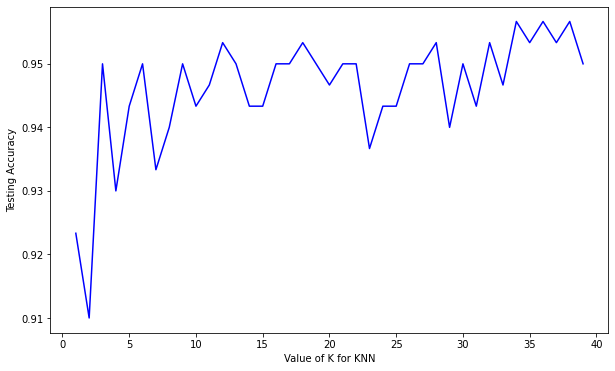

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),score, color='blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Error rate')

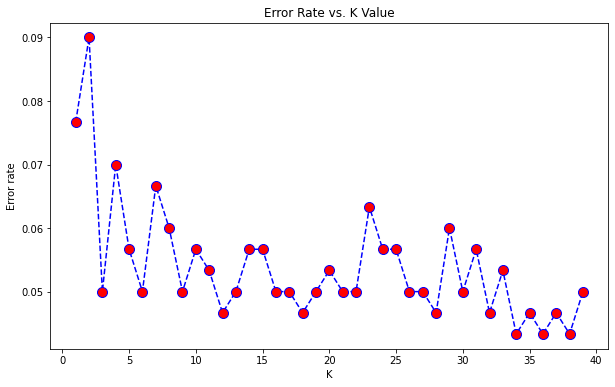

In [27]:
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle= 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error rate')

From the graph, we see that k=34 gives the lowest error rate. However, we may want to pick K = 3 as our best choice. The error rate was below 0.05 when K = 3, so it may not be worth to go all the way to K = 34 for such a slight improvement. Note: Picking K value is a trade-off between run-time and accuracy. When time is more valuable, we would want to pick a lower K value with similar performance. 

Compare K = 3 and K =34 

In [37]:
knn = KNeighborsClassifier(n_neighbors=3) # try k = 3 now
knn.fit(x_train, y_train) # fitting the model
pred = knn.predict(x_test) # make prediction on test data 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       159
           1       0.95      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [38]:
knn = KNeighborsClassifier(n_neighbors=34) # try k = 34 now
knn.fit(x_train, y_train) # fitting the model
pred = knn.predict(x_test) # make prediction on test data 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



As expected, the score only went up 0.01 when I changed K value from 3 to 34.

# Conclusion

1. Using KNN model, I was able to predict the class with 0.96 accuracy score.
2. Picking the right K value is crucial. When accuracy overrides time, we want to choose the K value that gives the lowest error rate. In contrast, when time is more valuable, the question becomes trickier. We must find the right balance between time and accuracy.  